**Import Neccesary Libraries**

In [495]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [496]:
# read image from path
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

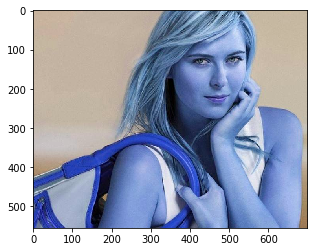

In [497]:
plt.imshow(img)

In [498]:
# convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

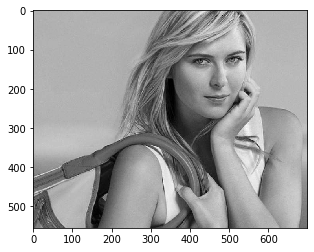

In [499]:
plt.imshow(gray, cmap='gray')

In [500]:
#use haar cascade for face detection
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [501]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

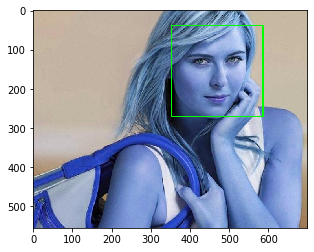

In [502]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
plt.imshow(face_img)

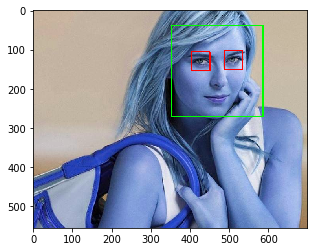

In [503]:
#use haar cascade api for eye detection
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]                  #roi meaning region of interest
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

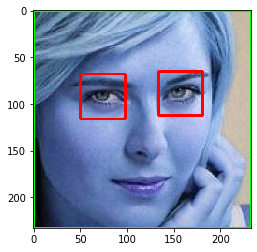

In [504]:
plt.imshow(roi_color, cmap='gray')

# Data Cleaning

In [505]:
#function to return cropped image
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]                  #roi meaning region of interest
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

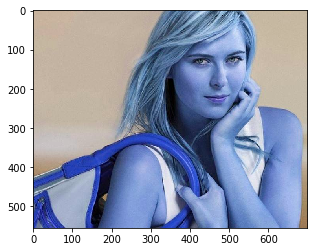

In [506]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)   


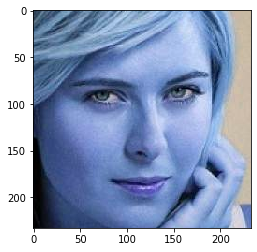

In [507]:
cropped_image1 =  get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image1) 



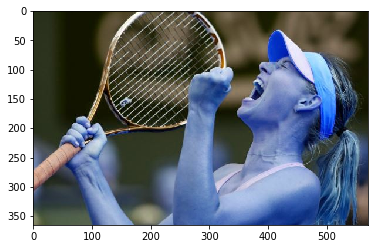

In [508]:
obstructed_image = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(obstructed_image)


In [509]:
cropped_image2 =  get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image2

In [510]:
#generate a cropped folder
path_to_data = "./Datasets/"
path_to_cr_data = "./Datasets/cropped/"

In [511]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [512]:
img_dirs

['./Datasets/Dwayne_Johnson',
 './Datasets/Lionel_Messi',
 './Datasets/Maria_Sharapova',
 './Datasets/Serena_Williams',
 './Datasets/Zlatan_Ibrahimovic']

In [513]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [514]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # split img dir list by slash to get each name
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []   # initialize the dictionary to key and value(empty list)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path) # for each image in the image folders apply the cropping function
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name  # create the image files in the crop folder
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)  # save the cropped inmage in the cropped folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
    

Dwayne_Johnson
Generating cropped images in folder: ./Datasets/cropped/Dwayne_Johnson
Lionel_Messi
Generating cropped images in folder: ./Datasets/cropped/Lionel_Messi
Maria_Sharapova
Generating cropped images in folder: ./Datasets/cropped/Maria_Sharapova
Serena_Williams
Generating cropped images in folder: ./Datasets/cropped/Serena_Williams
Zlatan_Ibrahimovic
Generating cropped images in folder: ./Datasets/cropped/Zlatan_Ibrahimovic


In [517]:
#creating the wavelet image transform function 
#credit stack overflow
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #convert to gray scale
    imArray  = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /=225
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # process the coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0]*=0
    
    #reconstructing the img array
    
    imArray_H= pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

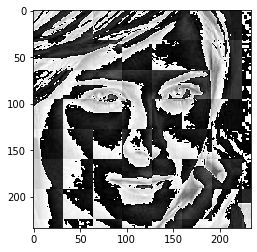

In [518]:
im_har = w2d(cropped_image1, 'db1',5)
plt.imshow(im_har, cmap='gray')

In [519]:
celebrity_file_names_dict

{'Dwayne_Johnson': ['./Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson1.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson2.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson3.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson4.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson5.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson6.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson7.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson8.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson9.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson10.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson11.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson12.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson13.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson14.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson15.png',
  './Datasets/cropped/Dwayne_Johnson/Dwayne_Johnson16.png',
  './Datasets/cropped/Dwayne_Jo

In [520]:
new_dict = {}
counter = 0
for celebrity_name in celebrity_file_names_dict.keys():
    new_dict[celebrity_name] = counter
    counter +=1
new_dict

{'Dwayne_Johnson': 0,
 'Lionel_Messi': 1,
 'Maria_Sharapova': 2,
 'Serena_Williams': 3,
 'Zlatan_Ibrahimovic': 4}

In [521]:
x =[]
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32)) 
        img_har = w2d(img, 'db1', 5)
        scaled_har_img = cv2.resize(img_har, (32,32)) 
        stacked_image = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_har_img.reshape(32*32,1)))
        x.append(stacked_image)
        y.append(new_dict[celebrity_name])
        

In [522]:
len(x)
len(x[0])

4096

In [523]:
len(y)

166

In [524]:
#convert the input values to an array of floats
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(166, 4096)

In [525]:
x[0]

array([112., 159., 215., ..., 217., 248., 250.])

**Training Process**

In [526]:
#Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [527]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [528]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C =10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [529]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.73      0.80      0.76        10
           2       0.67      0.67      0.67         6
           3       0.73      0.80      0.76        10
           4       1.00      0.25      0.40         8

    accuracy                           0.67        42
   macro avg       0.72      0.65      0.64        42
weighted avg       0.73      0.67      0.65        42



# Hyperparameter Tuning

**Use Grid search to try other models with different parameters. This would enable us ick the model and parameters with the best result**

In [530]:
# import relevant libraries
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [531]:
#define a dectionary for the models and parameters
model_parameters = {
    'svm': {
        'model': svm.SVC(gamma = 'auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
       'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
           
       
    }
}

In [532]:
# write a code to loop throught the above dictionary in order to get the best model and parameters
import pandas as pd
scores = []
best_estimators = {}
for model_name, each_model_params in model_parameters.items():
    pipe = make_pipeline(StandardScaler(), each_model_params['model'])
    clf = GridSearchCV(pipe, each_model_params['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
#for bettter readability we put the result in a dataframe

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.741667,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.516667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.782667,{'logisticregression__C': 1}


**Had a bug running the above code this was because  the parameters have to be named such that there are two underscores between the estimator name and its parameters**

In [533]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='rbf', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                     

In [534]:
best_estimators['svm'].score(X_test, y_test)

0.6666666666666666

In [543]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7380952380952381

In [536]:
best_clf = best_estimators['logistic_regression']

In [537]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 1, 1, 0],
       [1, 9, 0, 0, 0],
       [2, 0, 4, 0, 0],
       [1, 0, 0, 7, 2],
       [1, 0, 2, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'True_label')

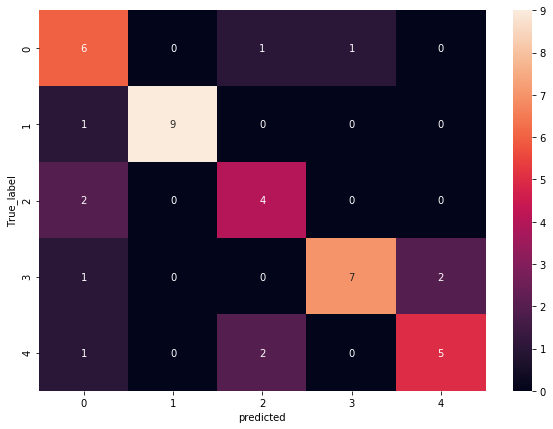

In [538]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('True_label')

In [539]:
new_dict

{'Dwayne_Johnson': 0,
 'Lionel_Messi': 1,
 'Maria_Sharapova': 2,
 'Serena_Williams': 3,
 'Zlatan_Ibrahimovic': 4}

**Save Model**

In [540]:
!pip install joblib
import joblib
# saving te model as a pickle file
joblib.dump(best_clf, 'trained_model.pkl')

['trained_model.pkl']

**Save the dictionary class** 

In [541]:
# save the dictionary as a json file
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(new_dict))